# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error


# Load Dataset

In [2]:
file_path = "adult.csv"

data = pd.read_csv(file_path)

pd.set_option("display.max_columns", None)
pd.set_option("display.width", 1000)
pd.set_option("display.colheader_justify", "left")

data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39.0,State-gov,77516.0,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,NaN,40.0,United-States,<=50K
1,50.0,Self-emp-not-inc,83311.0,Bachelors,NaN,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
2,38.0,Private,215646.0,HS-grad,9.0,Divorced,NaN,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
3,53.0,Private,234721.0,11th,7.0,Married-civ-spouse,NaN,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
4,28.0,Private,338409.0,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,NaN,40.0,Cuba,<=50K


In [3]:
data.dtypes

age               float64
workclass          object
fnlwgt            float64
education          object
education-num     float64
marital-status     object
occupation         object
relationship       object
race               object
sex                object
capital-gain      float64
capital-loss      float64
hours-per-week    float64
native-country     object
income             object
dtype: object

In [4]:
data.isnull().sum()

age               1628
workclass         3256
fnlwgt             651
education          326
education-num     2605
marital-status     977
occupation        4884
relationship      1302
race               163
sex                 33
capital-gain      1954
capital-loss      2279
hours-per-week    2930
native-country    3907
income             651
dtype: int64

In [5]:
numerical_features = [feature for feature in data.columns if data[feature].dtypes != "O"]
categorical_features = [feature for feature in data.columns if data[feature].dtypes == "O"]
target_variable = "income"
print("Numerical Features: ", numerical_features)
print("Categorical Features: ", categorical_features)
print("Target Variable: ", target_variable)

Numerical Features:  ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']
Categorical Features:  ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country', 'income']
Target Variable:  income


# Exploratory Data Analysis 

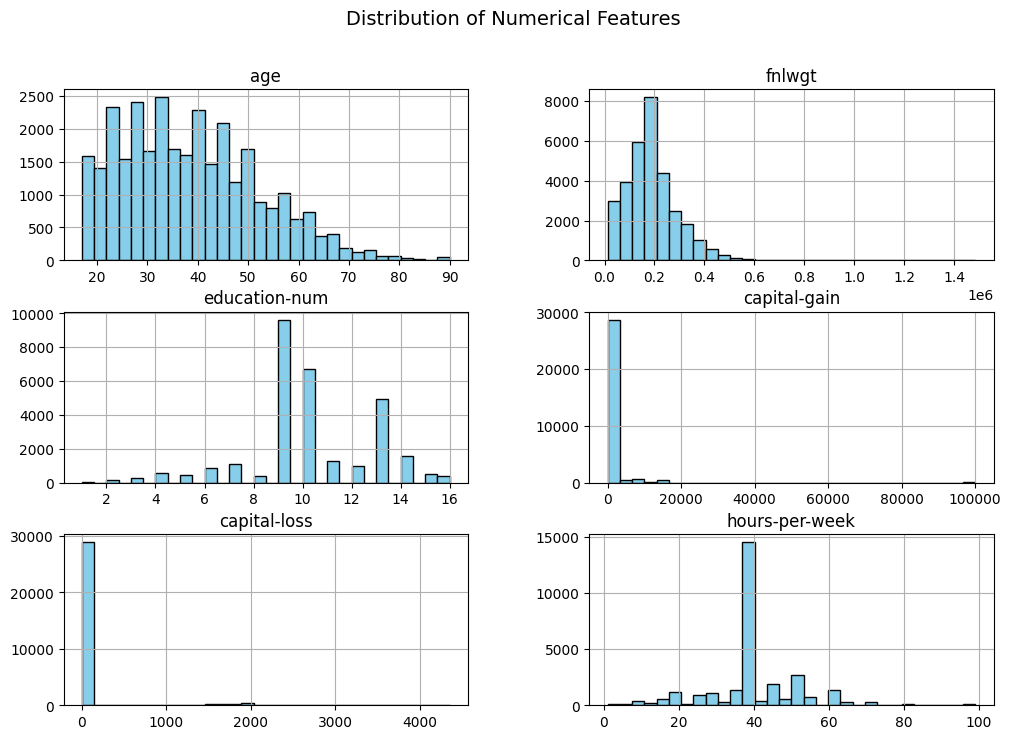

In [6]:
data[numerical_features].hist(figsize=(12, 8), bins=30, color="skyblue", edgecolor="black")
plt.suptitle("Distribution of Numerical Features", fontsize=14)
plt.show()


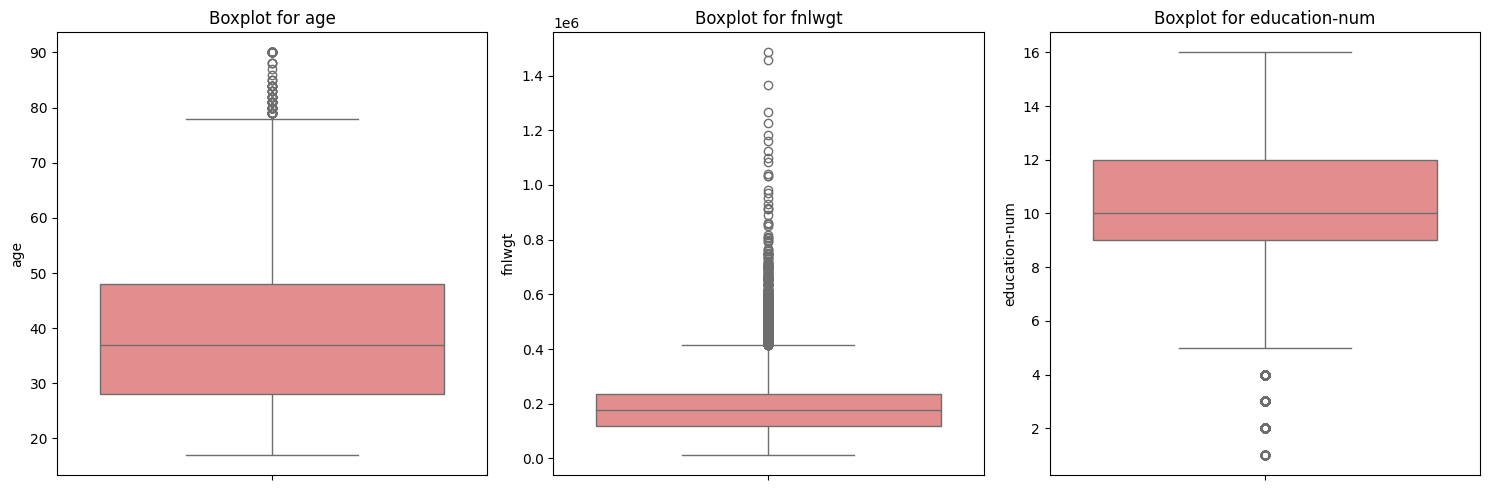

In [7]:
plt.figure(figsize=(15, 5))
for i, col in enumerate(numerical_features[:3]):  
    plt.subplot(1, 3, i+1)
    sns.boxplot(y=data[col], color="lightcoral")
    plt.title(f"Boxplot for {col}")
plt.tight_layout()
plt.show()

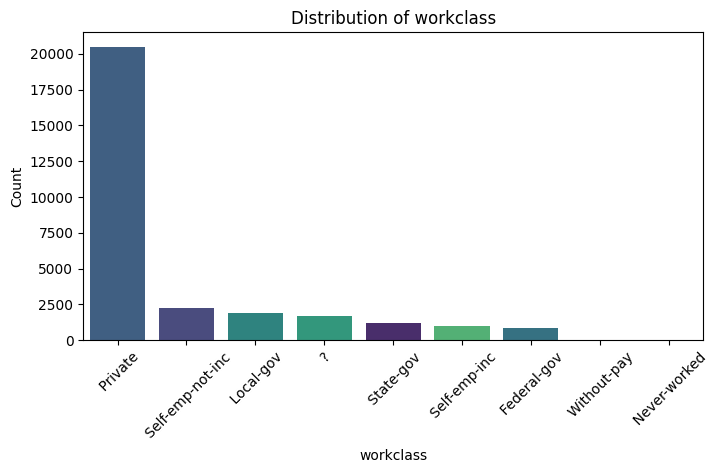

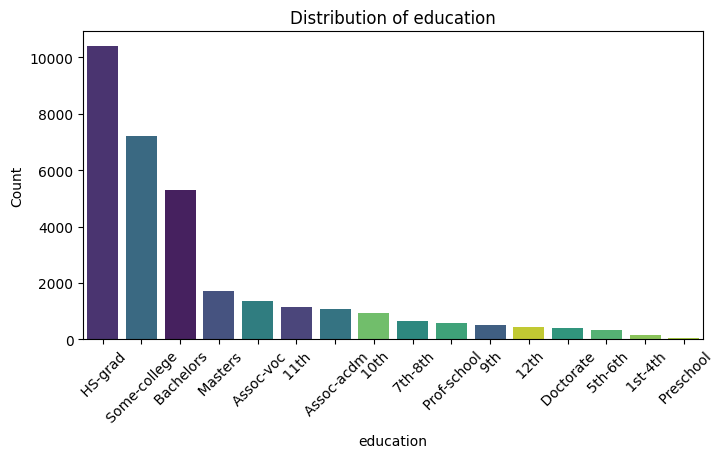

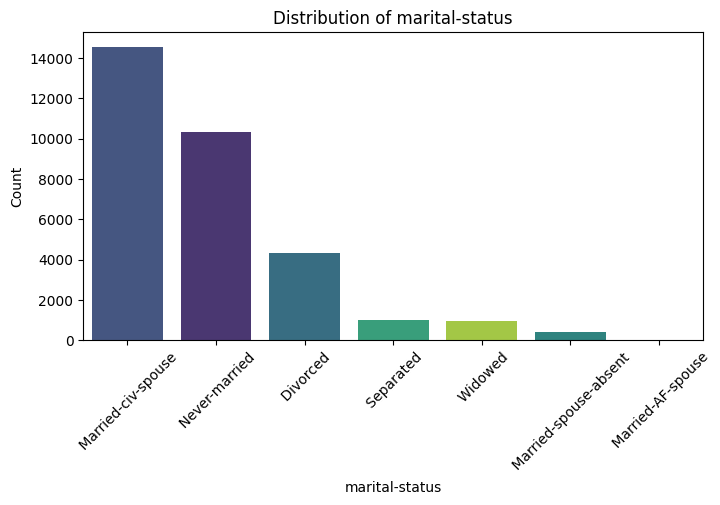

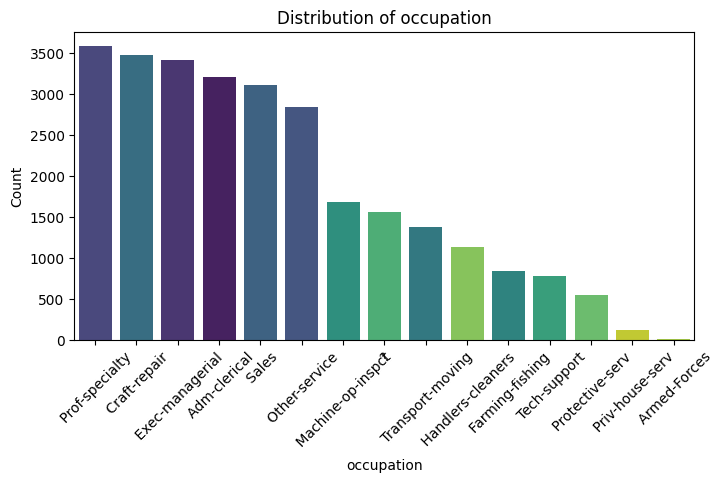

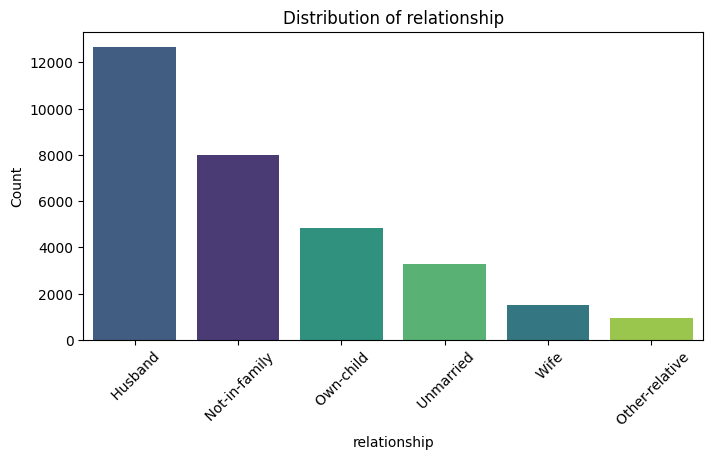

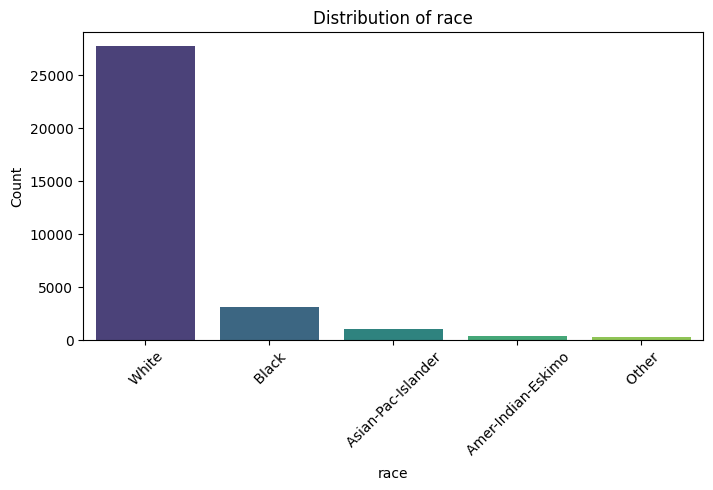

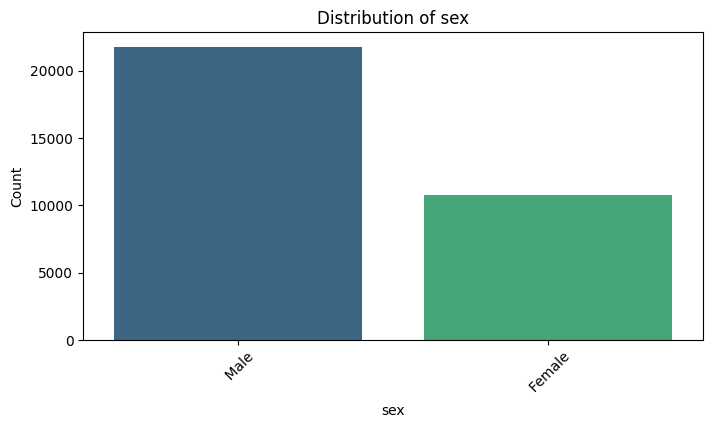

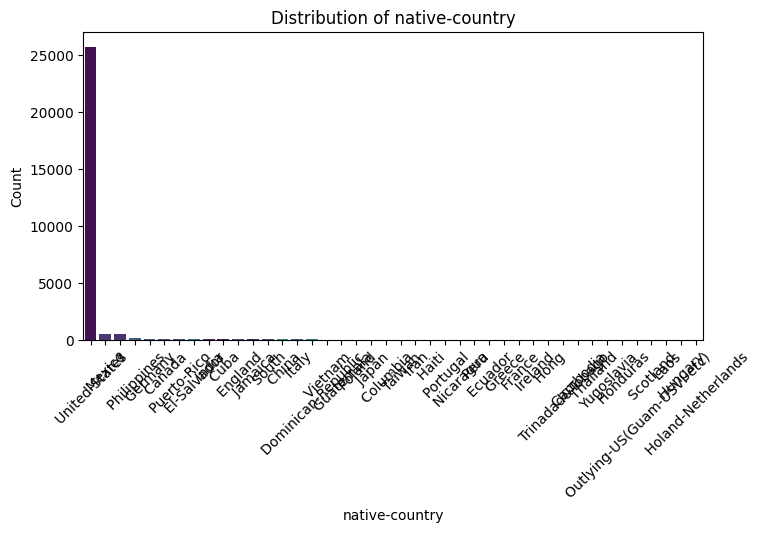

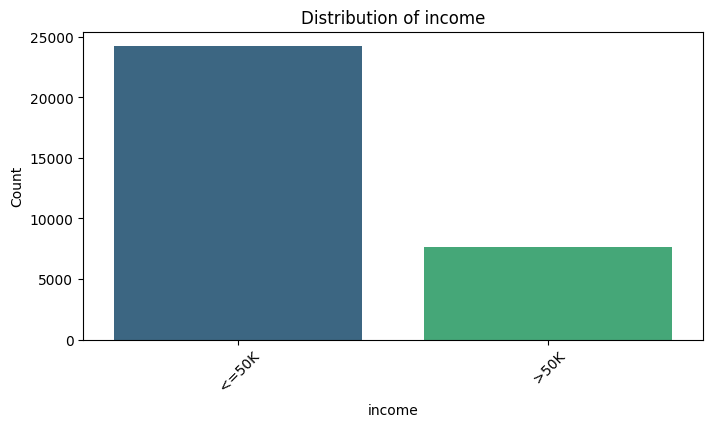

In [8]:

for col in categorical_features:  
    plt.figure(figsize=(8, 4))
    sns.countplot(x=data[col], hue=data[col], palette="viridis", order=data[col].value_counts().index, legend=False)
    plt.xticks(rotation=45)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.show()


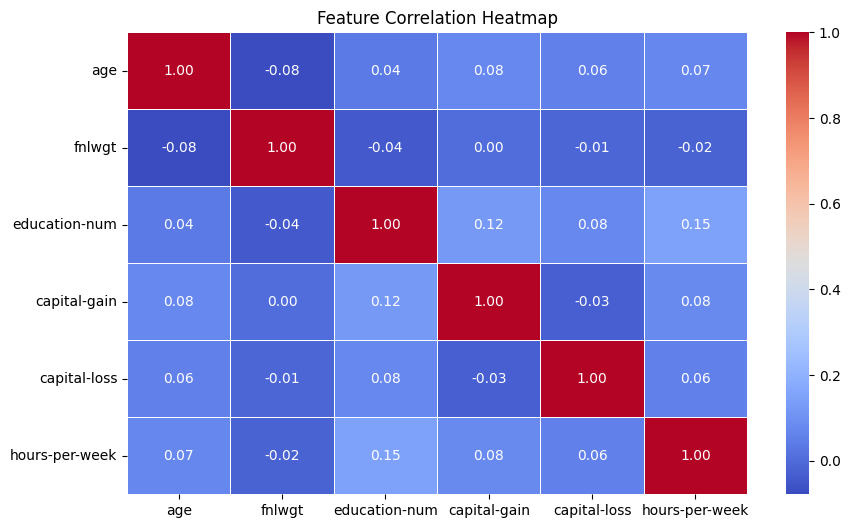

In [9]:
plt.figure(figsize=(10, 6))
sns.heatmap(data[numerical_features].corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

# Mean Imputation (rows with multiple Nan)

In [10]:
nan_counts = data[numerical_features].isna().sum(axis=1)
rows_with_multiple_nans = data[numerical_features][nan_counts > 1]
rows_with_multiple_nans = rows_with_multiple_nans.apply(lambda x: x.fillna(x.mean()), axis=0)
data.loc[rows_with_multiple_nans.index, numerical_features] = rows_with_multiple_nans

print(f"\nFinal number of 1 Nan: \n\n{data[numerical_features].isna().sum()}")


# 0 nan = 13423
# 1 nan = 12532
# >1 nan = 6615


Final number of 1 Nan: 

age               1158
fnlwgt             465
education-num     1916
capital-gain      1440
capital-loss      1631
hours-per-week    2212
dtype: int64


# Linear Regression Imputation (numerical features)

In [11]:
clean_numerical_data = data[numerical_features].dropna()
clean_numerical_data.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
2,38.0,215646.0,9.0,0.0,0.0,40.0
3,53.0,234721.0,7.0,0.0,0.0,40.0
6,49.0,160187.0,5.0,0.0,0.0,16.0
7,52.0,209642.0,9.0,0.0,0.0,45.0
9,42.0,159449.0,13.0,5178.0,0.0,40.0


In [12]:
clean_numerical_data.isnull().sum()

age               0
fnlwgt            0
education-num     0
capital-gain      0
capital-loss      0
hours-per-week    0
dtype: int64

In [13]:

results = {}
models = {} 

for target in clean_numerical_data.columns:
    print(f"\nTARGET == {target}")

    X = clean_numerical_data.drop(columns=[target])
    y = clean_numerical_data[target]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    model = LinearRegression()
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    results[target] = {"MAE": mae, "R2": r2}
    models[target] = model  

    predictions_df = X_test.copy()
    predictions_df[f"Actual {target}"] = y_test
    predictions_df[f"Predicted {target}"] = y_pred

    print(predictions_df.head())

print("\nFinal results:")
for feature, metrics in results.items():
    print(f"{feature} -> MAE: {metrics['MAE']:.4f}, R2: {metrics['R2']:.4f}")




TARGET == age
       fnlwgt    education-num  capital-gain  capital-loss  hours-per-week  Actual age  Predicted age
2082   297396.0  10.000000          0.0        0.000000     60.000000       40.0        37.969692    
14275  130856.0   9.000000          0.0       94.727982     39.937122       29.0        38.823770    
3651    30497.0  13.000000      15024.0        0.000000     60.000000       34.0        43.119500    
22473  111836.0  10.000000          0.0        0.000000     50.000000       32.0        39.405998    
6624   313986.0   9.992991          0.0       94.727982     40.000000       90.0        37.084926    

TARGET == fnlwgt
       age   education-num  capital-gain  capital-loss  hours-per-week  Actual fnlwgt  Predicted fnlwgt
2082   40.0  10.000000          0.0        0.000000     60.000000       297396.0       188831.366715   
14275  29.0   9.000000          0.0       94.727982     39.937122       130856.0       198282.349155   
3651   34.0  13.000000      15024.0        

In [14]:
missing_numerical_data = data[numerical_features][data[numerical_features].isna().any(axis=1)]
missing_numerical_data.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
0,39.0,77516.0,13.0,2174.0,NaN,40.0
1,50.0,83311.0,NaN,0.0,0.0,13.0
4,28.0,338409.0,13.0,0.0,NaN,40.0
5,37.0,284582.0,NaN,0.0,0.0,40.0
8,NaN,45781.0,14.0,14084.0,0.0,50.0


In [15]:


filled_numerical_data = missing_numerical_data.copy()

for target in missing_numerical_data.columns:
    X = missing_numerical_data[missing_numerical_data[target].isna()].drop(columns=[target])
    
    y_pred = models[target].predict(X)

    filled_numerical_data.loc[X.index, target] = y_pred

filled_numerical_data

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
0,39.000000,77516.000000,13.000000,2174.000000,124.985881,40.000000
1,50.000000,83311.000000,9.395268,0.000000,0.000000,13.000000
4,28.000000,338409.000000,13.000000,0.000000,109.311367,40.000000
5,37.000000,284582.000000,9.906145,0.000000,0.000000,40.000000
8,42.506097,45781.000000,14.000000,14084.000000,0.000000,50.000000
...,...,...,...,...,...,...
32538,38.000000,139180.000000,13.000000,15020.000000,0.000000,43.617643
32543,45.000000,119199.000000,12.000000,2196.649679,0.000000,48.000000
32552,43.000000,84661.000000,11.000000,0.000000,0.000000,40.976379
32553,32.000000,189628.513542,14.000000,0.000000,0.000000,11.000000


In [16]:
#copy results back to data
data.loc[filled_numerical_data.index, numerical_features] = filled_numerical_data


# Mode Imputation (categorical features)

In [17]:
data[categorical_features] = data[categorical_features].apply(lambda x: x.fillna(x.mode()[0]))

In [18]:
data.isnull().sum() , data.shape[0]

(age               0
 workclass         0
 fnlwgt            0
 education         0
 education-num     0
 marital-status    0
 occupation        0
 relationship      0
 race              0
 sex               0
 capital-gain      0
 capital-loss      0
 hours-per-week    0
 native-country    0
 income            0
 dtype: int64,
 32561)

In [19]:
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39.0,State-gov,77516.0,Bachelors,13.000000,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,124.985881,40.0,United-States,<=50K
1,50.0,Self-emp-not-inc,83311.0,Bachelors,9.395268,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.000000,13.0,United-States,<=50K
2,38.0,Private,215646.0,HS-grad,9.000000,Divorced,Prof-specialty,Not-in-family,White,Male,0.0,0.000000,40.0,United-States,<=50K
3,53.0,Private,234721.0,11th,7.000000,Married-civ-spouse,Prof-specialty,Husband,Black,Male,0.0,0.000000,40.0,United-States,<=50K
4,28.0,Private,338409.0,Bachelors,13.000000,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,109.311367,40.0,Cuba,<=50K


# Log Scaling (numerical features)

In [20]:

log_scaled_numerical_data = data[numerical_features].apply(np.log1p)       

log_scaled_numerical_data.head()



,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
0,3.688879,11.258253,2.639057,7.684784,4.836170,3.713572
1,3.931826,11.330348,2.341351,0.000000,0.000000,2.639057
2,3.663562,12.281398,2.302585,0.000000,0.000000,3.713572
3,3.988984,12.366157,2.079442,0.000000,0.000000,3.713572
4,3.367296,12.732013,2.639057,0.000000,4.703307,3.713572


In [21]:
log_scaled_numerical_data.isnull().sum()

age                 0
fnlwgt              0
education-num       0
capital-gain      228
capital-loss       66
hours-per-week      0
dtype: int64

# One Hot & Label Encoding (categorical features)

In [22]:
for feature in categorical_features:
    unique_values = data[feature].unique()
    print({feature})
    print(unique_values, "\n")


{'workclass'}
[' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-emp-inc' ' Without-pay' ' Never-worked'] 

{'education'}
[' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th'] 

{'marital-status'}
[' Never-married' ' Married-civ-spouse' ' Divorced'
 ' Married-spouse-absent' ' Separated' ' Married-AF-spouse' ' Widowed'] 

{'occupation'}
[' Adm-clerical' ' Exec-managerial' ' Prof-specialty' ' Other-service'
 ' Sales' ' Craft-repair' ' Transport-moving' ' Farming-fishing'
 ' Machine-op-inspct' ' Tech-support' ' ?' ' Protective-serv'
 ' Handlers-cleaners' ' Armed-Forces' ' Priv-house-serv'] 

{'relationship'}
[' Not-in-family' ' Husband' ' Wife' ' Own-child' ' Unmarried'
 ' Other-relative'] 

{'race'}
[' White' ' Black' ' Asian-Pac-Islander' ' Amer-Indian-Eskimo' ' Other'] 

{'sex'}
[' Male' ' Female'] 

{'native-country'}
[

In [23]:
# Label Encoding for Binary & Ordinal Features

categorical_encoded_data = data[categorical_features].copy()

education_order = [
    ' Preschool', ' 1st-4th', ' 5th-6th', ' 7th-8th', ' 9th', ' 10th', ' 11th', ' 12th',
    ' Some-college', ' Assoc-acdm', ' Assoc-voc', ' HS-grad', ' Bachelors',
    ' Masters', ' Prof-school', ' Doctorate'
]
education_map = {val: idx for idx, val in enumerate(education_order)}
categorical_encoded_data["education"] = categorical_encoded_data["education"].map(education_map)


# binary features
categorical_encoded_data["sex"] = categorical_encoded_data["sex"].map({" Male": 0, " Female": 1})


In [24]:
# One-Hot Encoding

one_hot_features = ["workclass", "marital-status", "occupation", "relationship", "race", "native-country"]
categorical_encoded_data = pd.get_dummies(categorical_encoded_data, columns=one_hot_features, drop_first=True) 

In [25]:
missing_values = categorical_encoded_data.isnull().sum()
print("Features with missing values:")
print(missing_values[missing_values > 0])

Features with missing values:
Series([], dtype: int64)


In [26]:
# Drop NaNs from log_scaled_numerical_data

log_scaled_numerical_data = log_scaled_numerical_data.dropna() #SINCE SOME VALUES IN LOSS AND GAIN ARE NEGATIVE AND LOG WONT WORK THOSE ROWS ARE DROPPED

# Keep only the rows in categorical_encoded_data that match the cleaned numerical data
categorical_encoded_data = categorical_encoded_data.loc[log_scaled_numerical_data.index]



final_data = pd.concat([log_scaled_numerical_data, categorical_encoded_data], axis=1)


In [27]:
log_scaled_numerical_data

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
0,3.688879,11.258253,2.639057,7.684784,4.836170,3.713572
1,3.931826,11.330348,2.341351,0.000000,0.000000,2.639057
2,3.663562,12.281398,2.302585,0.000000,0.000000,3.713572
3,3.988984,12.366157,2.079442,0.000000,0.000000,3.713572
4,3.367296,12.732013,2.639057,0.000000,4.703307,3.713572
...,...,...,...,...,...,...
32556,3.332205,12.458010,2.564949,0.000000,0.000000,3.663562
32557,3.713572,11.947140,2.302585,0.000000,0.000000,3.713572
32558,4.077537,11.931050,2.302585,7.335444,0.000000,3.713572
32559,3.135494,12.213500,2.302585,0.000000,0.000000,3.044522


In [28]:
categorical_encoded_data

,education,sex,income,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,workclass_ Without-pay,marital-status_ Married-AF-spouse,marital-status_ Married-civ-spouse,marital-status_ Married-spouse-absent,marital-status_ Never-married,marital-status_ Separated,marital-status_ Widowed,occupation_ Adm-clerical,occupation_ Armed-Forces,occupation_ Craft-repair,occupation_ Exec-managerial,occupation_ Farming-fishing,occupation_ Handlers-cleaners,occupation_ Machine-op-inspct,occupation_ Other-service,occupation_ Priv-house-serv,occupation_ Prof-specialty,occupation_ Protective-serv,occupation_ Sales,occupation_ Tech-support,occupation_ Transport-moving,relationship_ Not-in-family,relationship_ Other-relative,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,native-country_ Cambodia,native-country_ Canada,native-country_ China,native-country_ Columbia,native-country_ Cuba,native-country_ Dominican-Republic,native-country_ Ecuador,native-country_ El-Salvador,native-country_ England,native-country_ France,native-country_ Germany,native-country_ Greece,native-country_ Guatemala,native-country_ Haiti,native-country_ Holand-Netherlands,native-country_ Honduras,native-country_ Hong,native-country_ Hungary,native-country_ India,native-country_ Iran,native-country_ Ireland,native-country_ Italy,native-country_ Jamaica,native-country_ Japan,native-country_ Laos,native-country_ Mexico,native-country_ Nicaragua,native-country_ Outlying-US(Guam-USVI-etc),native-country_ Peru,native-country_ Philippines,native-country_ Poland,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
0,12,0,<=50K,False,False,False,False,False,False,True,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
1,12,0,<=50K,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
2,11,0,<=50K,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
3,6,0,<=50K,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
4,12,1,<=50K,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False

In [30]:
final_data.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,education,sex,income,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,workclass_ Without-pay,marital-status_ Married-AF-spouse,marital-status_ Married-civ-spouse,marital-status_ Married-spouse-absent,marital-status_ Never-married,marital-status_ Separated,marital-status_ Widowed,occupation_ Adm-clerical,occupation_ Armed-Forces,occupation_ Craft-repair,occupation_ Exec-managerial,occupation_ Farming-fishing,occupation_ Handlers-cleaners,occupation_ Machine-op-inspct,occupation_ Other-service,occupation_ Priv-house-serv,occupation_ Prof-specialty,occupation_ Protective-serv,occupation_ Sales,occupation_ Tech-support,occupation_ Transport-moving,relationship_ Not-in-family,relationship_ Other-relative,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,native-country_ Cambodia,native-country_ Canada,native-country_ China,native-country_ Columbia,native-country_ Cuba,native-country_ Dominican-Republic,native-country_ Ecuador,native-country_ El-Salvador,native-country_ England,native-country_ France,native-country_ Germany,native-country_ Greece,native-country_ Guatemala,native-country_ Haiti,native-country_ Holand-Netherlands,native-country_ Honduras,native-country_ Hong,native-country_ Hungary,native-country_ India,native-country_ Iran,native-country_ Ireland,native-country_ Italy,native-country_ Jamaica,native-country_ Japan,native-country_ Laos,native-country_ Mexico,native-country_ Nicaragua,native-country_ Outlying-US(Guam-USVI-etc),native-country_ Peru,native-country_ Philippines,native-country_ Poland,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
0,3.688879,11.258253,2.639057,7.684784,4.836170,3.713572,12,0,<=50K,False,False,False,False,False,False,True,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
1,3.931826,11.330348,2.341351,0.000000,0.000000,2.639057,12,0,<=50K,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
2,3.663562,12.281398,2.302585,0.000000,0.000000,3.713572,11,0,<=50K,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
3,3.988984,12.366157,2.079442,0.000000,0.000000,3.713572,6,0,<=50K,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False

In [31]:
#moving income col to col = 0

col_to_move = "income"  
final_data.insert(0, col_to_move, final_data.pop(col_to_move))


In [32]:
missing_values = final_data.isnull().sum()
print("Features with missing values:")
print(missing_values[missing_values > 0])

Features with missing values:
Series([], dtype: int64)


In [33]:
final_data.head()

,income,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,education,sex,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,workclass_ Without-pay,marital-status_ Married-AF-spouse,marital-status_ Married-civ-spouse,marital-status_ Married-spouse-absent,marital-status_ Never-married,marital-status_ Separated,marital-status_ Widowed,occupation_ Adm-clerical,occupation_ Armed-Forces,occupation_ Craft-repair,occupation_ Exec-managerial,occupation_ Farming-fishing,occupation_ Handlers-cleaners,occupation_ Machine-op-inspct,occupation_ Other-service,occupation_ Priv-house-serv,occupation_ Prof-specialty,occupation_ Protective-serv,occupation_ Sales,occupation_ Tech-support,occupation_ Transport-moving,relationship_ Not-in-family,relationship_ Other-relative,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,native-country_ Cambodia,native-country_ Canada,native-country_ China,native-country_ Columbia,native-country_ Cuba,native-country_ Dominican-Republic,native-country_ Ecuador,native-country_ El-Salvador,native-country_ England,native-country_ France,native-country_ Germany,native-country_ Greece,native-country_ Guatemala,native-country_ Haiti,native-country_ Holand-Netherlands,native-country_ Honduras,native-country_ Hong,native-country_ Hungary,native-country_ India,native-country_ Iran,native-country_ Ireland,native-country_ Italy,native-country_ Jamaica,native-country_ Japan,native-country_ Laos,native-country_ Mexico,native-country_ Nicaragua,native-country_ Outlying-US(Guam-USVI-etc),native-country_ Peru,native-country_ Philippines,native-country_ Poland,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
0,<=50K,3.688879,11.258253,2.639057,7.684784,4.836170,3.713572,12,0,False,False,False,False,False,False,True,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
1,<=50K,3.931826,11.330348,2.341351,0.000000,0.000000,2.639057,12,0,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
2,<=50K,3.663562,12.281398,2.302585,0.000000,0.000000,3.713572,11,0,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
3,<=50K,3.988984,12.366157,2.079442,0.000000,0.000000,3.713572,6,0,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False

# Training Prep

In [34]:
# ENCODING TARGET VARIABLE

final_data["income"] = final_data["income"].map({" <=50K": 0, " >50K": 1})      

In [35]:

X = final_data.drop(columns=['income']).values.astype(np.float64)  
y = final_data['income'].values.reshape(-1, 1).astype(np.float64)  

# Split dataset 
np.random.seed(42)
indices = np.random.permutation(len(X))
train_size = int(0.8 * len(X))
train_indices, test_indices = indices[:train_size], indices[train_size:]
X_train, X_test = X[train_indices], X[test_indices]
y_train, y_test = y[train_indices], y[test_indices]



# Logistic Regresssion

In [36]:

class LogisticRegressionScratch:
    def __init__(self, learning_rate=0.01, epochs=1000, l1_lambda=0.01):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.l1_lambda = l1_lambda
        self.weights = None
        self.bias = None
        self.loss_history = []

    def sigmoid(self, z):
        z = np.array(z, dtype=np.float64)  
        return 1 / (1 + np.exp(-z))

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros((n_features, 1))
        self.bias = 0

        for epoch in range(self.epochs):
            linear_model = np.dot(X, self.weights) + self.bias
            y_predicted = self.sigmoid(linear_model)

            dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y)) + self.l1_lambda * np.sign(self.weights)
            db = (1 / n_samples) * np.sum(y_predicted - y)

            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

            loss = -np.mean(y * np.log(y_predicted + 1e-9) + (1 - y) * np.log(1 - y_predicted + 1e-9))
            loss += self.l1_lambda * np.sum(np.abs(self.weights))
            self.loss_history.append(loss)

            if epoch % 100 == 0:
                print(f"Epoch {epoch}: Loss = {loss:.4f}")

    def predict(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        y_predicted = self.sigmoid(linear_model)
        return (y_predicted >= 0.5).astype(int)


model = LogisticRegressionScratch(learning_rate=0.01, epochs=1000, l1_lambda=0.01)
model.fit(X_train, y_train)

predictions = model.predict(X_test)

accuracy = np.mean(predictions == y_test) * 100
print(f"Model Accuracy: {accuracy:.2f}%")


Epoch 0: Loss = 0.6941
Epoch 100: Loss = 0.4985
Epoch 200: Loss = 0.4831
Epoch 300: Loss = 0.4749
Epoch 400: Loss = 0.4694
Epoch 500: Loss = 0.4652
Epoch 600: Loss = 0.4617
Epoch 700: Loss = 0.4587
Epoch 800: Loss = 0.4561
Epoch 900: Loss = 0.4539
Model Accuracy: 79.19%


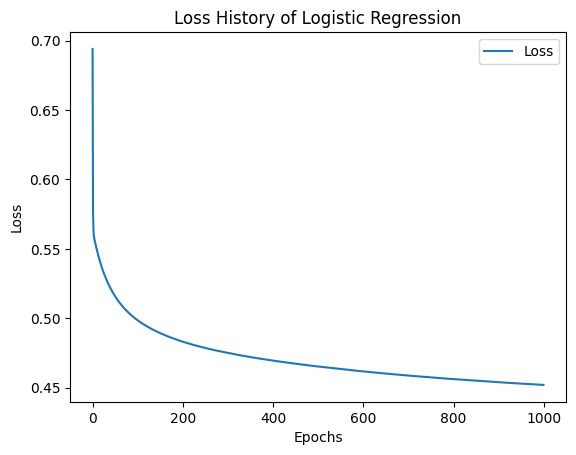

In [37]:

plt.plot(range(model.epochs), model.loss_history, label="Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss History of Logistic Regression")
plt.legend()
plt.show()


# SVM

In [38]:

class SVM:
    def __init__(self, learning_rate=5e-5, lambda_param=0.001, epochs=1000):
        self.learning_rate = learning_rate
        self.lambda_param = lambda_param
        self.epochs = epochs
        self.weights = None
        self.bias = None
        self.loss_history = []  

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        y_ = np.where(y <= 0, -1, 1).flatten()  

        for epoch in range(self.epochs):
            loss = 0
            for idx, x_i in enumerate(X):
                condition = y_[idx] * (np.dot(x_i, self.weights) + self.bias) >= 1
                if condition:
                    self.weights -= self.learning_rate * (self.lambda_param * np.sign(self.weights))
                else:
                    self.weights -= self.learning_rate * (self.lambda_param * np.sign(self.weights) - y_[idx] * x_i * 0.01)  # L1 REGULARIZATION
                    self.bias -= self.learning_rate * y_[idx] * 0.01  

                loss += max(0, 1 - y_[idx] * (np.dot(x_i, self.weights) + self.bias))

            loss = loss / n_samples + self.lambda_param * np.sum(np.abs(self.weights))
            self.loss_history.append(loss)  

            if epoch % 100 == 0:  
                print(f"Epoch {epoch}: Loss = {loss:.4f}")

    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        return np.where(linear_output >= 0, 1, 0)

svm_model = SVM(learning_rate=5e-4, lambda_param=0.0001, epochs=1000)
svm_model.fit(X_train, y_train)

predictions = svm_model.predict(X_test)

accuracy = np.mean(predictions == y_test.flatten()) * 100
print(f"Model Accuracy: {accuracy:.2f}%")


Epoch 0: Loss = 0.5015
Epoch 100: Loss = 0.4520
Epoch 200: Loss = 0.4433
Epoch 300: Loss = 0.4398
Epoch 400: Loss = 0.4381
Epoch 500: Loss = 0.4372
Epoch 600: Loss = 0.4366
Epoch 700: Loss = 0.4362
Epoch 800: Loss = 0.4361
Epoch 900: Loss = 0.4360
Model Accuracy: 79.80%


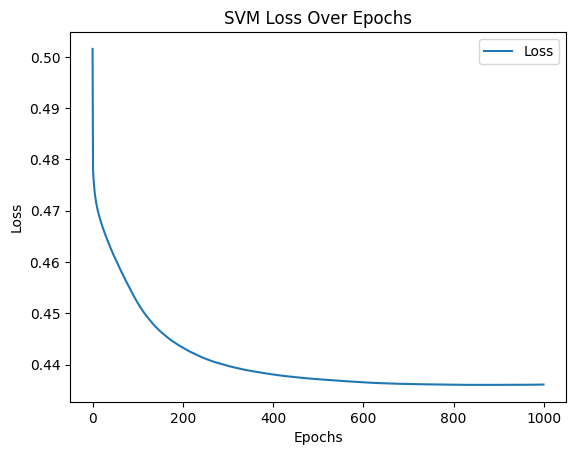

In [39]:

plt.plot(range(len(svm_model.loss_history)), svm_model.loss_history, label="Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("SVM Loss Over Epochs")
plt.legend()
plt.show()


# Model Comparison

In [55]:
def calculate_accuracy(y_true, y_pred):
    return np.sum(y_true == y_pred) / len(y_true)
    
def calculate_confusion_matrix(y_true, y_pred):
    true_pos = np.sum((y_true == 1) & (y_pred == 1))
    false_pos = np.sum((y_true == 0) & (y_pred == 1))
    true_neg = np.sum((y_true == 0) & (y_pred == 0))
    false_neg = np.sum((y_true == 1) & (y_pred == 0))

    return np.array([[true_neg, false_pos], [false_neg, true_pos]])

def calculate_precision(y_true, y_pred):
    cm = calculate_confusion_matrix(y_true, y_pred)
    true_pos = cm[1, 1]
    false_pos = cm[0, 1]

    if true_pos + false_pos == 0:
        return 0
    return true_pos / (true_pos + false_pos)

def calculate_recall(y_true, y_pred):
    cm = calculate_confusion_matrix(y_true, y_pred)
    true_pos = cm[1, 1]
    false_neg = cm[1, 0]

    if true_pos + false_neg == 0:
        return 0
    return true_pos / (true_pos + false_neg)

def calculate_f1(y_true, y_pred):
    precision = calculate_precision(y_true, y_pred)
    recall = calculate_recall(y_true, y_pred)

    if precision + recall == 0:
        return 0
    return 2 * (precision * recall) / (precision + recall)

                Logistic Regression        SVM  
-------------------------------------------------------
accuracy        0.7919                     0.7980
precision       0.7091                     0.7180
recall          0.2479                     0.2816
f1              0.3674                     0.4046
final_loss      0.4519                     0.4361


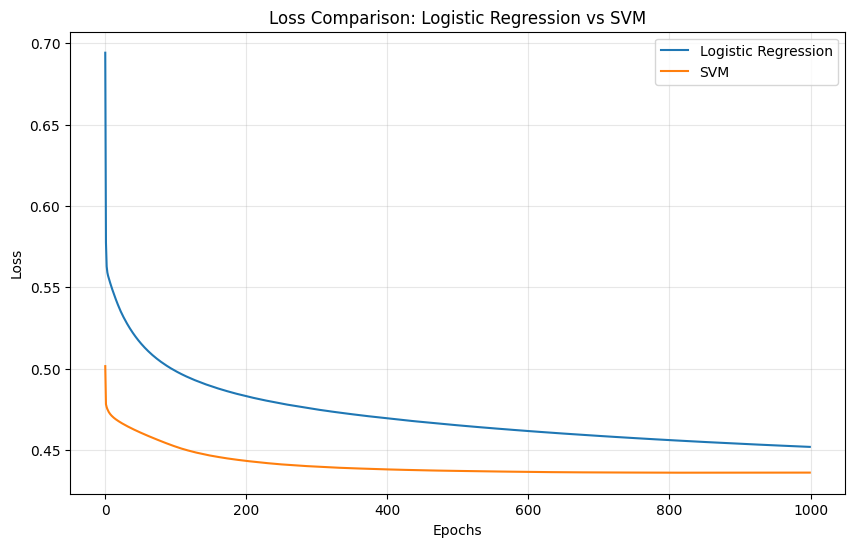

SVM model performs better with F1 score of 0.4046 vs 0.3674 for Logistic Regression
The better model shows a 10.11% improvement in F1 score

SVM model is better


In [ ]:
def compare_existing_models(model_lr, model_svm, X_test, y_test):
    
    lr_preds = model_lr.predict(X_test)
    svm_preds = model_svm.predict(X_test)
    
    y_test_flat = y_test.flatten() if hasattr(y_test, 'flatten') else np.array(y_test)
    lr_preds_flat = lr_preds.flatten() if hasattr(lr_preds, 'flatten') else np.array(lr_preds)
    svm_preds_flat = svm_preds.flatten() if hasattr(svm_preds, 'flatten') else np.array(svm_preds)
    
    results = {
        'Logistic Regression': {
            'accuracy': calculate_accuracy(y_test_flat, lr_preds_flat),
            'precision': calculate_precision(y_test_flat, lr_preds_flat),
            'recall': calculate_recall(y_test_flat, lr_preds_flat),
            'f1': calculate_f1(y_test_flat, lr_preds_flat),
            'confusion_matrix': calculate_confusion_matrix(y_test_flat, lr_preds_flat),
            'final_loss': model_lr.loss_history[-1] if hasattr(model_lr, 'loss_history') and model_lr.loss_history else None
        },
        'SVM': {
            'accuracy': calculate_accuracy(y_test_flat, svm_preds_flat),
            'precision': calculate_precision(y_test_flat, svm_preds_flat),
            'recall': calculate_recall(y_test_flat, svm_preds_flat),
            'f1': calculate_f1(y_test_flat, svm_preds_flat),
            'confusion_matrix': calculate_confusion_matrix(y_test_flat, svm_preds_flat),
            'final_loss': model_svm.loss_history[-1] if hasattr(model_svm, 'loss_history') and model_svm.loss_history else None
        }
    }
    
    print(f"{' ':<15} {'Logistic Regression':<26} {'SVM':<5}")
    print("-" * 55)
    
    for metric in ['accuracy', 'precision', 'recall', 'f1', 'final_loss']:
        lr_value = results['Logistic Regression'][metric]
        svm_value = results['SVM'][metric]
        
        if isinstance(lr_value, float):
            print(f"{metric:<15} {lr_value:.4f}{'':<20} {svm_value:.4f}")
        else:
            print(f"{metric:<15} {str(lr_value):<20} {str(svm_value):<20}")
    
    if (hasattr(model_lr, 'loss_history') and model_lr.loss_history and 
        hasattr(model_svm, 'loss_history') and model_svm.loss_history):
        plt.figure(figsize=(10, 6))
        plt.plot(model_lr.loss_history, label='Logistic Regression')
        plt.plot(model_svm.loss_history, label='SVM')
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.title('Loss Comparison: Logistic Regression vs SVM')
        plt.legend()
        plt.grid(True, alpha=0.3)
        plt.show()
    
    lr_f1 = results['Logistic Regression']['f1']
    svm_f1 = results['SVM']['f1']
    
    if lr_f1 > svm_f1:
        print("Logistic Regression model performs better with F1 score of {:.4f} vs {:.4f} for SVM".format(lr_f1, svm_f1))
        better_model = "Logistic Regression"
    elif svm_f1 > lr_f1:
        print("SVM model performs better with F1 score of {:.4f} vs {:.4f} for Logistic Regression".format(svm_f1, lr_f1))
        better_model = "SVM"
    else:
        print("Both models perform equally with F1 score of {:.4f}".format(lr_f1))
        better_model = "Both equally"
    
    if lr_f1 != svm_f1:
        improvement = abs(lr_f1 - svm_f1) / min(lr_f1, svm_f1) * 100
        print("The better model shows a {:.2f}% improvement in F1 score".format(improvement))
    
    return results, better_model

comparison_results, better_model = compare_existing_models(model, svm_model, X_test, y_test)
print(f"\n{better_model} model is better")